## Model Building: Tree-Based Regression

In this section, a decision tree regression model is trained to predict housing
prices based on the selected features. Tree-based models are useful because they
can capture non-linear relationships and are easy to interpret.


In [1]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

The California housing data was obtained from [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices). The dataset is licensed under a [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/) license.


In [2]:
# Import data
df = pd.read_csv('California Housing Data.csv', delimiter = ",")

In [3]:
# Explore the size of the data set
### BEGIN SOLUTION
print('The size of the data is: ',df.size)

### END SOLUTION

The size of the data is:  206400


In [4]:
# Explore the type of data and feature names
### BEGIN SOLUTION
print('The type of data are as follows:')
print(df.dtypes)

print('\n\n')
### END SOLUTION

The type of data are as follows:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object





With this data set, you should use `longitude` and `latitude` as features and `median_house_value` as the response.

In [5]:
# Split data into features (X) and response (y)
### BEGIN SOLUTION
x=df.loc[:,['longitude','latitude']]
y=df.loc[:,['median_house_value']]

print(x,y)
### END SOLUTION

       longitude  latitude
0        -122.23     37.88
1        -122.22     37.86
2        -122.24     37.85
3        -122.25     37.85
4        -122.25     37.85
...          ...       ...
20635    -121.09     39.48
20636    -121.21     39.49
20637    -121.22     39.43
20638    -121.32     39.43
20639    -121.24     39.37

[20640 rows x 2 columns]        median_house_value
0                452600.0
1                358500.0
2                352100.0
3                341300.0
4                342200.0
...                   ...
20635             78100.0
20636             77100.0
20637             92300.0
20638             84700.0
20639             89400.0

[20640 rows x 1 columns]


In [6]:
# Fit data to tree-based regression model
regressor = DecisionTreeRegressor(random_state=0)
### BEGIN SOLUTION
regressor.fit(x,y)
### END SOLUTION

DecisionTreeRegressor(random_state=0)

The rest of the code has been completed for you. Execute the cells to visualise the decision tree.

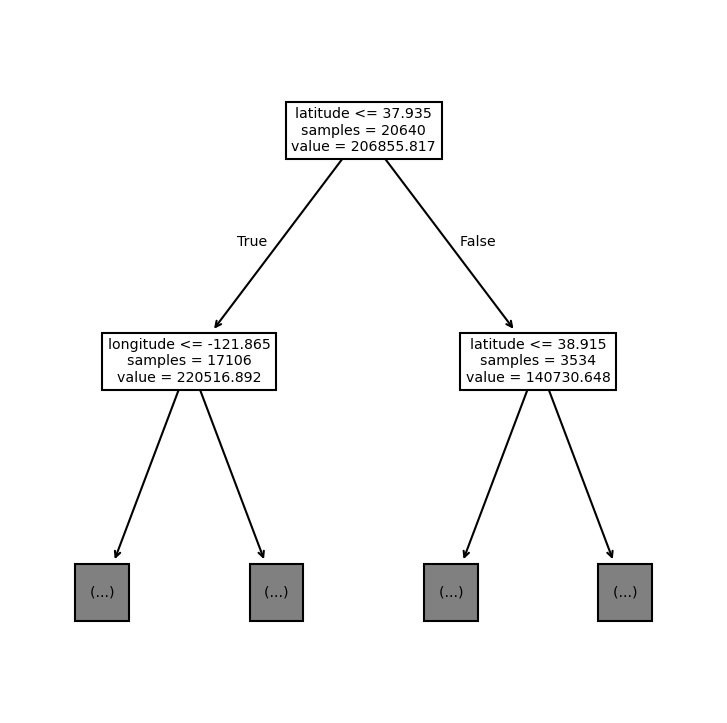

<Axes: xlabel='longitude', ylabel='latitude'>

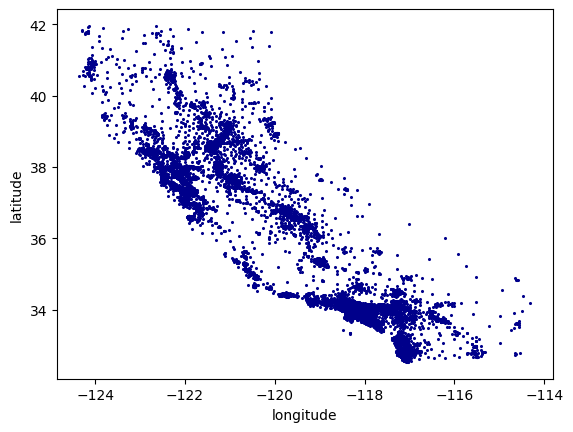

In [7]:
# Visualising the decision tree regression results
plt.figure(figsize=(6,6), dpi=150)
plot_tree(regressor,max_depth=1,feature_names=x.columns, impurity=False)
plt.show()

# A scatter plot of latitude vs longitude
df.plot.scatter(x='longitude',y='latitude',c='DarkBlue',s=1.5)

#Interpretation
The exploratory analysis shows that housing locations are not randomly distributed
but follow clear geographic patterns across California. The scatter plot of
longitude versus latitude highlights strong spatial structure, indicating that
location plays an important role in determining housing prices.

The decision tree regression model confirms this observation. The first split in
the tree is based on latitude, effectively separating northern and southern
regions of the state. Subsequent splits further divide areas based on longitude
and latitude, suggesting that regional differences strongly influence median
house values.

The predicted values within each terminal node represent average house prices
for specific geographic regions. This indicates that the model has learned
meaningful spatial relationships and is using location as a key driver of price
variation rather than producing random predictions.


# Conclusion

This analysis demonstrates that even a simple tree-based regression model can
capture important spatial patterns in housing prices. Geographic location alone
is able to explain broad differences in median house values across California.

However, the model provides region-level estimates rather than precise individual
predictions. Housing prices are influenced by many additional factors such as
income, housing quality, and proximity to services, which are not fully captured
in this simplified model. As a result, the model is best suited for understanding
general trends rather than exact price forecasting.
